In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
!ls

DR5_cluster-catalog_v1.1.fits	       platelist.fits
galaxy_DR12v5_CMASSLOWZ_North.fits     temp.ipynb
galaxy_DR12v5_CMASSLOWZ_North.fits.gz


In [3]:
dat = Table.read('galaxy_DR12v5_CMASSLOWZ_North.fits', format='fits')
galaxies = dat[['RA', 'DEC', 'Z']].to_pandas()
galaxies

,RA,DEC,Z
0,195.071285,-0.590771,0.465648
1,195.022992,-0.610999,0.565802
2,195.079741,0.348981,0.612211
3,195.170574,0.359864,0.502060
4,195.204289,0.347267,0.559173
...,...,...,...
850359,221.591765,63.863893,0.199543
850360,221.554537,63.825759,0.201655
850361,223.989695,63.093170,0.267434
850362,224.145463,62.983435,0.153101


In [4]:
dat = Table.read('DR5_cluster-catalog_v1.1.fits', format='fits')
clusters = dat[['RADeg', 'decDeg', 'redshift', 'redshiftType']].to_pandas()
clusters = clusters[clusters['redshiftType'] == b'spec']
clusters = clusters[['RADeg', 'decDeg', 'redshift']]
clusters.columns = ['RA', 'DEC', 'Z']
clusters

,RA,DEC,Z
2,0.089900,-28.091249,0.282570
4,0.113533,-1.044811,0.438800
5,0.113980,-5.880625,0.201735
6,0.179087,2.418388,0.422747
8,0.237447,-7.212461,0.551449
...,...,...,...
4182,359.255741,-34.752895,0.050400
4184,359.396652,-11.115428,0.407104
4186,359.537634,19.574917,0.494000
4191,359.887357,2.138787,0.429373


In [55]:
def plot_galaxies(galaxies, clusters,
                  ra_int=(0, 360), dec_int=(-90, 90), z_int=(0,1),
                  fig_size=(16, 8),
                  points_show=False, points_s=10, points_alpha=1.0,
                  hist_show=False, hist_bins=(200, 100),
                  kde_show=False, kde_s=100, kde_alpha=1.0, kde_bins=(200j, 200j),
                  clusters_show=False, clusters_s=200, clusters_alpha=1.0,
                  save=False, name='temp.png'):
    g = galaxies[
            (ra_int[0] < galaxies['RA']) & (galaxies['RA'] < ra_int[1]) & \
            (dec_int[0] < galaxies['DEC']) & (galaxies['DEC'] < dec_int[1]) & \
            (z_int[0] < galaxies['Z']) & (galaxies['Z'] < z_int[1])
        ]
    c = clusters[
            (ra_int[0] < clusters['RA']) & (clusters['RA'] < ra_int[1]) & \
            (dec_int[0] < clusters['DEC']) & (clusters['DEC'] < dec_int[1]) & \
            (z_int[0] < clusters['Z']) & (clusters['Z'] < z_int[1])
        ]
    
    font = {'size': 16}
    plt.rc('font', **font)
    fig = plt.figure(figsize=fig_size)
    
    if kde_show:
        d = np.vstack((g['RA'], g['DEC']))
        X, Y = np.mgrid[ra_int[0]:ra_int[1]:kde_bins[0], dec_int[0]:dec_int[1]:kde_bins[1]]
        pos = np.vstack([X.ravel(), Y.ravel()]) 
        kernel = gaussian_kde(d, bw_method=0.03)
        z = kernel(pos)
        plt.scatter(pos[0], pos[1], c=z, s=kde_s, alpha=kde_alpha)
    
    if hist_show:
        plt.hist2d(g['RA'], g['DEC'], hist_bins, cmap=plt.cm.hot)
        plt.colorbar()
    
    if clusters_show:
        plt.scatter(c['RA'], c['DEC'], c='yellow', s=clusters_s, alpha=clusters_alpha)
        
    if points_show:
        plt.scatter(g['RA'], g['DEC'], c='r', s=points_s)
    
    plt.title(f'Z in {z_int}')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    
    if save:
        plt.savefig(name, dpi=300, format='jpg')

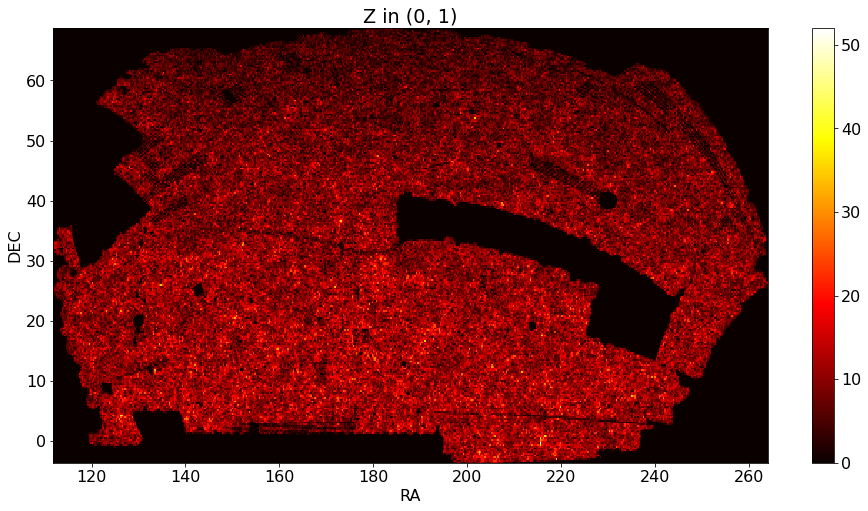

In [67]:
plot_galaxies(
    galaxies=galaxies, 
    clusters=clusters,
    hist_show=True, hist_bins=(500, 250)
)

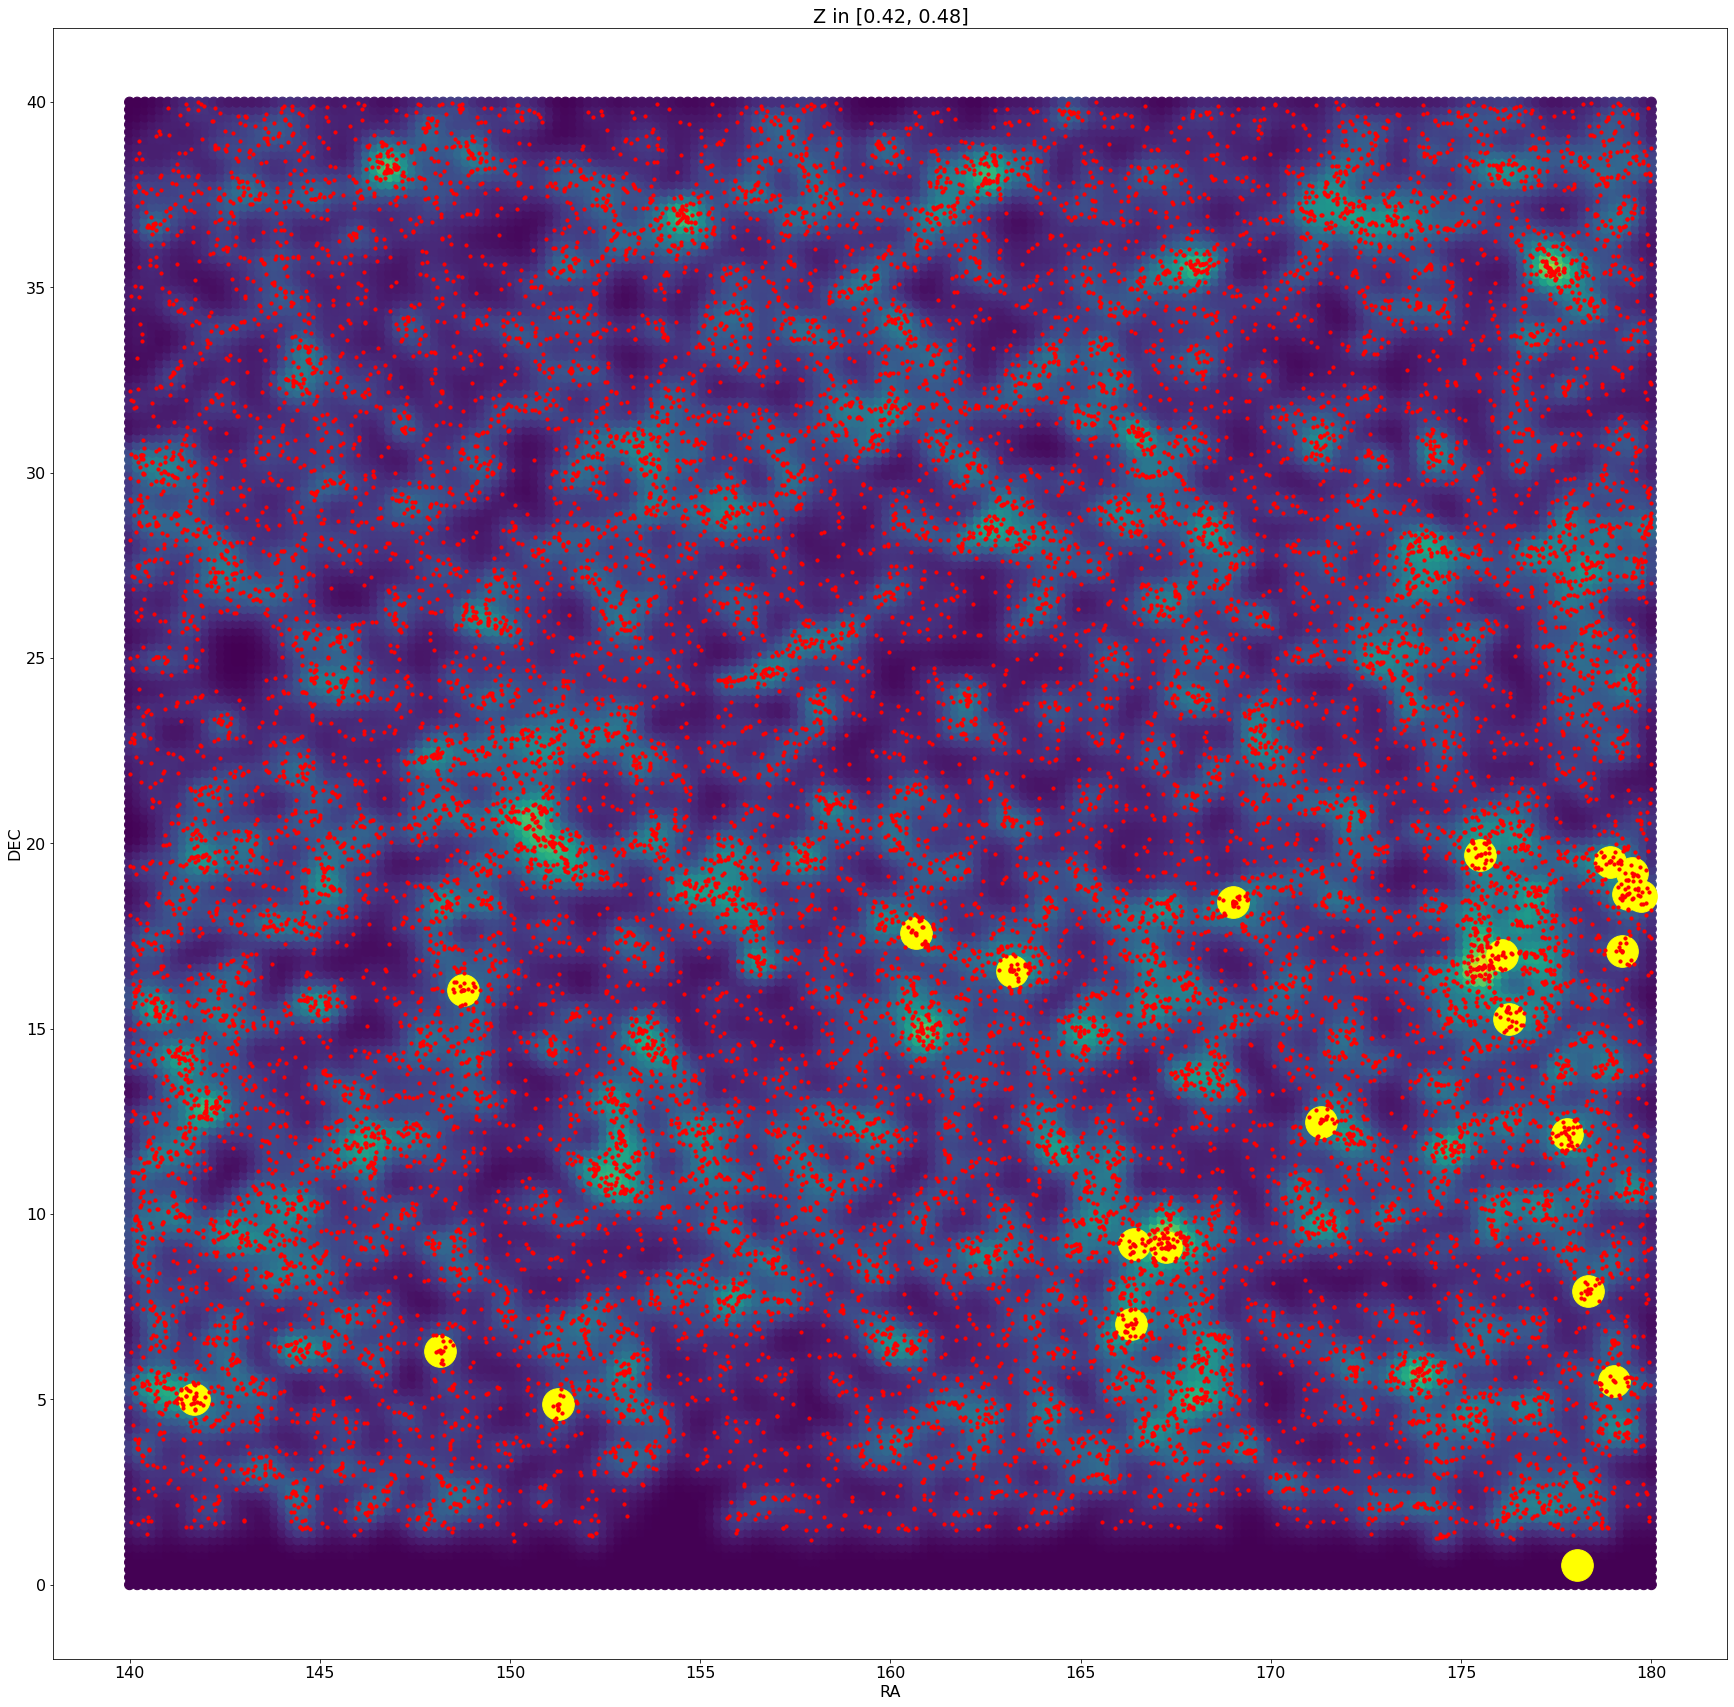

In [65]:
plot_galaxies(
    galaxies=galaxies, 
    clusters=clusters,
    ra_int=[140,180],
    dec_int=[0,40],
    z_int=[0.42,0.48],
    fig_size=(30, 30),
    clusters_show=True, clusters_alpha=1.0, clusters_s=1000,
    points_show=True, points_s=10,
    kde_show=True, kde_alpha=1.0,
)